<h1>Para este Hackaton</h1>

<p>Nuestro equipo ha optado por realizar una actializacion de nuestra web-app previamente presentada. Esta web app se encarga de realizar predicciones meteorologicas en base a una serie de datos proporcionados a travez de un formulario; automatizado gracias a un modelo de machine learning entrenado usando el metodo de arboles aleatorios <strong><<"Random Forest">></strong>.</p>

<p>Con esta actualizacion lo que se quiere lograr es, implementar un segundo modelo que pueda llevar a cabo dichas predicciones, pero con una premisa un poco diferente, y es que este nuevo modelo realizara dichas predicciones con datos que seran un poco mas complicados de manejar, es decir, imagenes.</p>

<p>Lo que se quiere lograr con esta implementacion es fomentar aun mas la portabilidad de nuestra app, permitiendo realizar predicciones sin necesidad de una abrumadora cantidad de datos.</p>

<h3>Primero cargamos las imagenes para saber si todo el directorio se encuentra en orden
</h3>

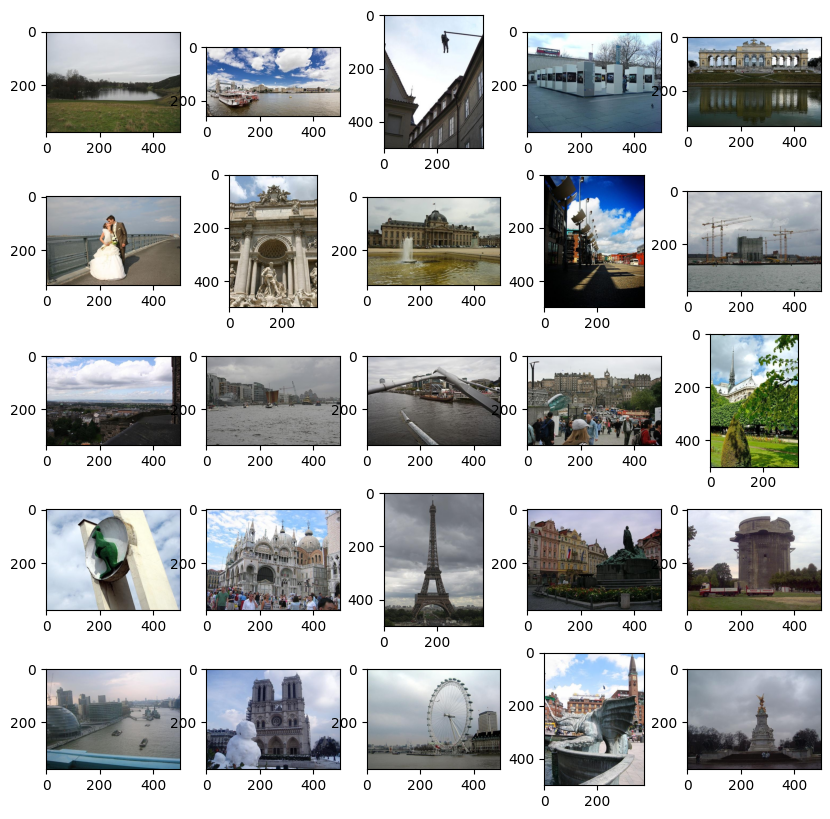

In [3]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

carpeta="img_source/0"

plt.figure(figsize=(10,10))

img = os.listdir(carpeta)

for i, img_name in enumerate(img[:25]):
    plt.subplot(5,5,i+1)
    imagen=mpimg.imread(carpeta+"/"+img_name)
    plt.imshow(imagen) 

<h3>Creamos nuestras funciones claves encargadas del manejo de imagenes</h3>

In [4]:
import cv2 as cv
import numpy as np
import os
from tqdm import tqdm
from pathlib import Path

def read_image(clase: str, path_class: str) -> tuple:

    lista_imagenes = []
    lista_targets = []
    print(f'********* guardando clase {clase} *********')
    for img in tqdm(os.listdir(path_class), desc=f"Cargando {clase}"):
        path_img = path_class + "/" + img
        img = cv.imread(path_img, cv.IMREAD_COLOR)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        lista_imagenes.append(img)
        lista_targets.append(clase)
    return lista_imagenes, lista_targets

def resize_image(img):

    resized_image = cv.resize(img, (224, 224))

    resized_image = resized_image.astype(np.float32) / 255.0
    
    return resized_image

def process_dataset(weather_types, path_rute):

    l_img = []
    l_target = []
    

    for clase, ruta_clase in zip(weather_types, path_rute):
        lista_imagenes, lista_labels = read_image(clase, ruta_clase)
        l_img.extend(lista_imagenes)
        l_target.extend(lista_labels)

    print("\nRedimensionando imágenes a 224x224...")
    l_img_resize = [resize_image(img) for img in tqdm(l_img, desc="Redimensionando")]
    
    return np.array(l_img_resize), np.array(l_target)

In [5]:
weather_path="img_source"

weather_types=os.listdir(weather_path)

path_rute = [weather_path + '/' + class_soil for class_soil in weather_types]
path_rute

['img_source/0', 'img_source/1', 'img_source/2', 'img_source/3']

In [6]:
for i in range(len(weather_types)):
  print(f'clase es {weather_types[i]} ruta es ::: {path_rute[i]}')

clase es 0 ruta es ::: img_source/0
clase es 1 ruta es ::: img_source/1
clase es 2 ruta es ::: img_source/2
clase es 3 ruta es ::: img_source/3


In [7]:
X_data, y_labels = process_dataset(weather_types, path_rute)


********* guardando clase 0 *********


Cargando 0: 100%|██████████| 1000/1000 [00:09<00:00, 102.42it/s]


********* guardando clase 1 *********


Cargando 1: 100%|██████████| 1000/1000 [00:08<00:00, 115.71it/s]


********* guardando clase 2 *********


Cargando 2: 100%|██████████| 1000/1000 [00:12<00:00, 80.46it/s]


********* guardando clase 3 *********


Cargando 3: 100%|██████████| 1000/1000 [00:12<00:00, 81.85it/s]



Redimensionando imágenes a 224x224...


Redimensionando: 100%|██████████| 4000/4000 [00:58<00:00, 68.90it/s] 


In [8]:

from sklearn.model_selection import train_test_split
import numpy as np


X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_data, 
    y_labels,
    test_size=0.2,  
    random_state=42,  
    stratify=y_labels  
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,  
    random_state=42,
    stratify=y_train_val
)


print("Formas de los conjuntos de datos:")
print(f"X_train: {X_train.shape} - y_train: {y_train.shape}")
print(f"X_val: {X_val.shape} - y_val: {y_val.shape}")
print(f"X_test: {X_test.shape} - y_test: {y_test.shape}")


print("\nDistribución de clases:")
for dataset_name, y_data in [("Entrenamiento", y_train), 
                            ("Validación", y_val), 
                            ("Prueba", y_test)]:
    unique, counts = np.unique(y_data, return_counts=True)
    print(f"\n{dataset_name}:")
    for class_label, count in zip(unique, counts):
        print(f"  Clase {class_label}: {count} imágenes ({count/len(y_data)*100:.2f}%)")

Formas de los conjuntos de datos:
X_train: (2400, 224, 224, 3) - y_train: (2400,)
X_val: (800, 224, 224, 3) - y_val: (800,)
X_test: (800, 224, 224, 3) - y_test: (800,)

Distribución de clases:

Entrenamiento:
  Clase 0: 600 imágenes (25.00%)
  Clase 1: 600 imágenes (25.00%)
  Clase 2: 600 imágenes (25.00%)
  Clase 3: 600 imágenes (25.00%)

Validación:
  Clase 0: 200 imágenes (25.00%)
  Clase 1: 200 imágenes (25.00%)
  Clase 2: 200 imágenes (25.00%)
  Clase 3: 200 imágenes (25.00%)

Prueba:
  Clase 0: 200 imágenes (25.00%)
  Clase 1: 200 imágenes (25.00%)
  Clase 2: 200 imágenes (25.00%)
  Clase 3: 200 imágenes (25.00%)


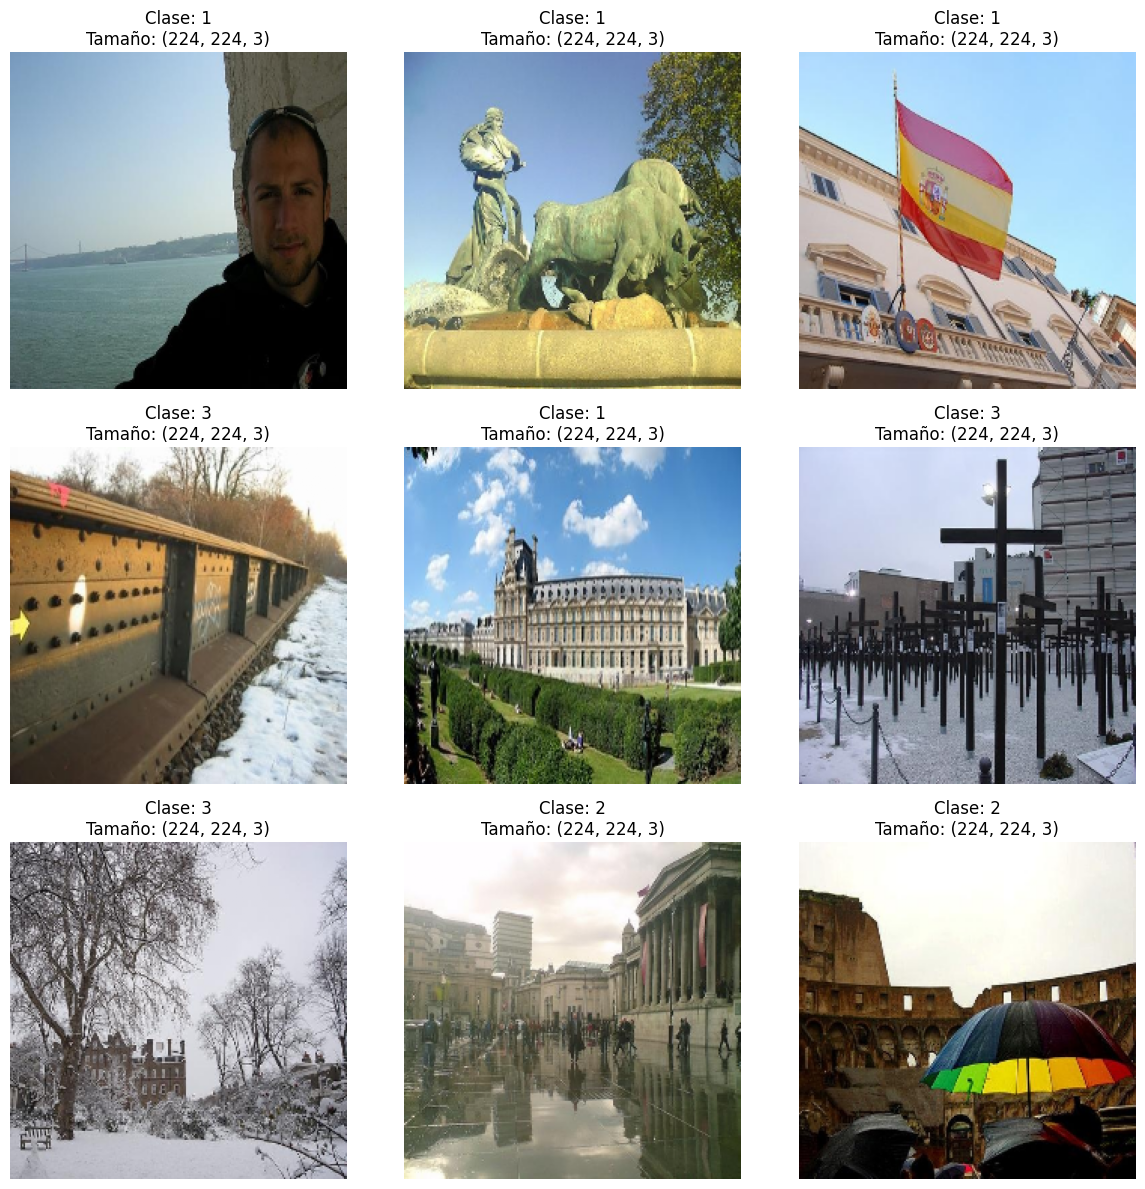

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))


for i in range(9):
    idx = np.random.randint(0, len(X_train))
    

    img = X_train[idx]
    

    plt.subplot(3, 3, i + 1)
    

    plt.imshow(img)
    

    plt.title(f'Clase: {y_train[idx]}\nTamaño: {img.shape}')
    

    plt.axis('off')


plt.tight_layout()


plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Model

# Obtener el número de clases únicas
num_classes = len(np.unique(y_labels))

# Crear el modelo base MobileNetV2
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Congelar el modelo base
base_model.trainable = False

# Crear el modelo completo
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar el resumen del modelo
model.summary()import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Model

# Obtener el número de clases únicas
num_classes = len(np.unique(y_labels))

# Crear el modelo base MobileNetV2
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Congelar el modelo base
base_model.trainable = False

# Crear el modelo completo
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar el resumen del modelo
model.summary()